In [1]:
# Import Libraries
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bioinformatics Libraries
import Bio
import scanpy as sc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the pbmc3k dataset
adata = sc.datasets.pbmc3k()

print(adata)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


In [3]:
# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata)


AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'


In [4]:
# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize the data
sc.pp.log1p(adata)

# Store the raw data
adata.raw = adata



In [5]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Filter the data
adata = adata[:, adata.var.highly_variable]

# Summarize the highly variable genes
print(adata.var.highly_variable.sum())


1872


In [6]:
adata

View of AnnData object with n_obs × n_vars = 2700 × 1872
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

## Dimension Reduction

### PCA

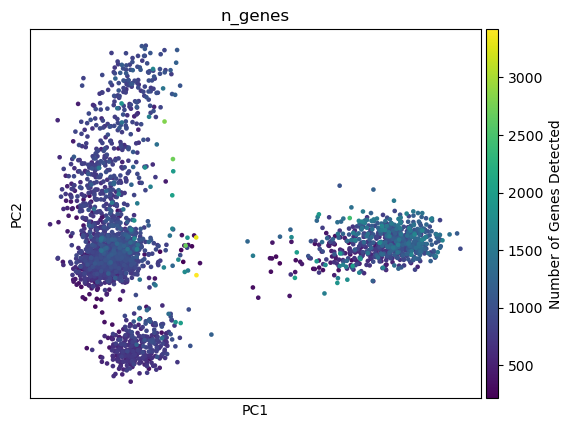

In [7]:
# Run PCA
sc.tl.pca(adata, svd_solver='arpack')

# Visualize the PCA results with coloring by 'n_genes'
sc.pl.pca(adata, color='n_genes', show=False)  # `show=False` to prevent immediate plot display

# Get current axis and figure
ax = plt.gca()
fig = plt.gcf()

# Find the color bar in the current figure
colorbar = ax.collections[0].colorbar

# Set the label for the color bar
colorbar.set_label('Number of Genes Detected')

# Display the plot
plt.show()



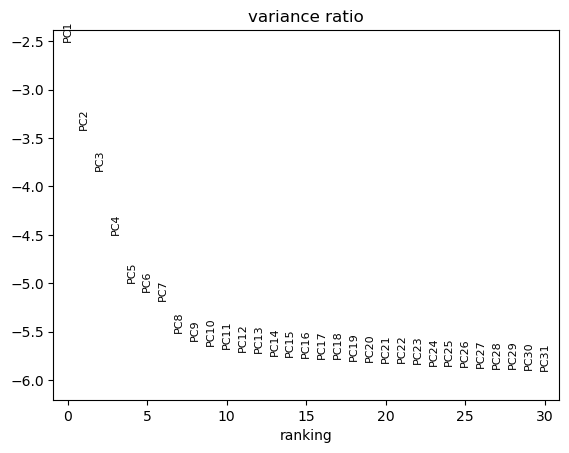

In [8]:
# Plot the explained variance (PCA)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=30, show=True)  # `show=False` to prevent automatic display

